In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')
import pandas as pd
import seaborn as sns
from bokeh.plotting import figure

directory = '/Users/zach//GRB160625B.945_LAT-trigger_correlated-optical-polarized-emission/'
# directory = '/home/jeff/GRB160625B.945_LAT-trigger_correlated-optical-polarized-emission/'
file_n5 = 'glg_cspec_n5_bn160625945_v01.rsp'
#file_n7 = 'glg_tte_n7_bn160625945_v00.fit'
#file_b1 = 'glg_tte_b1_bn160625945_v00.fit'

# HDU: Header Data Unit
hdu_n5 = fits.open(directory + file_n5)

#hdu_n7 = fits.open(directory + file_n7)


# print(hdu_n5.info())
#print(repr(hdu_n5['SPECRESP MATRIX'].header))
print(hdu_n5['SPECRESP MATRIX'].columns)
#print(hdu_n5['EBOUNDS'].columns)
#print(hdu_n2['SPECRESP MATRIX'].data)

ColDefs(
    name = 'ENERG_LO'; format = '1E'; unit = 'keV'
    name = 'ENERG_HI'; format = '1E'; unit = 'keV'
    name = 'N_GRP'; format = '1I'
    name = 'F_CHAN'; format = 'PI(1)'
    name = 'N_CHAN'; format = 'PI(1)'
    name = 'MATRIX'; format = 'PE(128)'; unit = 'cm**2'
)


In [40]:
# rmf file
ENERG_LO= hdu_n5['SPECRESP MATRIX'].data['ENERG_LO']
ENERG_HI= hdu_n5['SPECRESP MATRIX'].data['ENERG_HI']
N_GRP= hdu_n5['SPECRESP MATRIX'].data['N_GRP']
F_CHAN= hdu_n5['SPECRESP MATRIX'].data['F_CHAN']

MATRIX= hdu_n5['SPECRESP MATRIX'].data['MATRIX']
# arf file 
E_MIN= hdu_n5['EBOUNDS'].data['E_MIN']
E_MAX= hdu_n5['EBOUNDS'].data['E_MAX']
CHANNEL=hdu_n5['EBOUNDS'].data['CHANNEL']


In [60]:
def power_law(param,x):
    y = param[0]*(x**param[1])
    return np.array(y,dtype='float64')

In [61]:
ENERGY_ARRAY=np.append(ENERG_LO, ENERG_HI[139])
POWER_LAW_COEFFICIENT=[1,-0.1]

In [43]:
NbPhoton_Sim= power_law(POWER_LAW_COEFFICIENT,ENERGY_ARRAY)

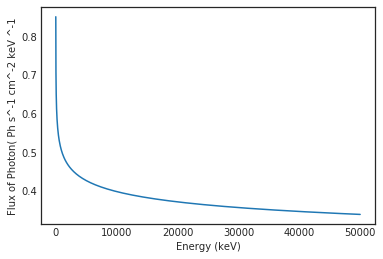

In [31]:
plt.plot(ENERGY_ARRAY,NbPhoton_Sim)
plt.ylabel('Flux of Photon( Ph s^-1 cm^-2 keV ^-1')
plt.xlabel('Energy (keV)')
plt.show()

In [32]:
df=pd.DataFrame(ENERGY_ARRAY,columns=['EnergyArray'])
df['NbPhoton_Sim']=NbPhoton_Sim

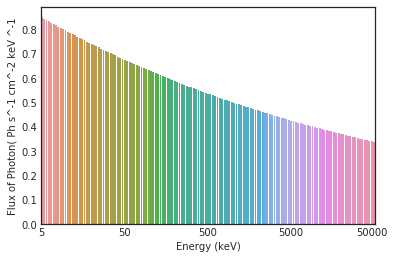

In [33]:
ax = sns.barplot(x="EnergyArray", y="NbPhoton_Sim", data=df)
ax.set(xlabel='Energy (keV)', ylabel='Flux of Photon( Ph s^-1 cm^-2 keV ^-1')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
x_pos_list = np.array([0,35,70,105,139])
x_value_list = ('5', '50', '500', '5000','50000')
ax.xaxis.set_major_locator(ticker.FixedLocator((x_pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((x_value_list)))
plt.show()

In [9]:
# to gert the avg value of range between E1 and E2. 
#EnergyArray_for_bar_list=[]
#for i in range(len(EnergyArray)):
    #if i<len(EnergyArray)-1:
        #EnergyArray_for_bar=(myfunc(Power_law_coeff,EnergyArray[i+1])+myfunc(Power_law_coeff,EnergyArray[i]))/2
        #EnergyArray_for_bar_list.append(EnergyArray_for_bar) 

In [57]:
# Area
photon_area = np.zeros(140)
for i, _ in enumerate(NbPhoton_Sim):
    if i == (len(NbPhoton_Sim) - 1):
        break
    elem = np.append(NbPhoton_Sim[i], NbPhoton_Sim[i+1])
    photon_area[i] = np.trapz(elem, dx=2)


In [58]:
matrix= np.zeros(shape=(140,128))
for i in range(len(MATRIX)):
    if MATRIX[i][0]==0:
        matrix[i]=[0]*128
    else:
        matrix[i]=MATRIX[i]
    # normalization
#for i in range(len(matrix)):
        #if matrix[i][0]!=0:
            #matrix[i] = matrix[i]/sum(matrix[i])
#print(matrix)
matrix_trans=matrix.transpose()

In [78]:
# Find the solution within the linear system. Or doesn't need this. 
#a = matrix
#b = NbPhoton_Sim
#x = np.linalg.solve(a, b)

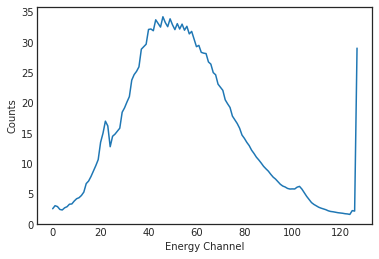

In [59]:
a = photon_area
b = matrix
Channel=np.dot(a, b)
plt.plot(Channel)
plt.ylabel('Counts')
plt.xlabel('Energy Channel')
plt.show()